Abstract:
Our Aim is to Predict the quality of fund i.e the Morning star value of the Fund. The morning star value is a significant indicator of the potential future performance. The data given to us is based on the performance of last 3 Years and no disclosure regarding the Market conditions have been made. So for a Much more accurate prediction, we can also include variable regarding market condition.

There a few rows with multiple Null values and they have been dropped.

For the Null Values in 1 Month, 1 Year and 3 Years , we have used mean as imputation. The Mean of Each category based on Risk has been used to impute the Null values for each of them
For eg. if a fund with null value having risk High, we have used to mean of High risk for its imputation. The same has been done for Low, Moderate and Very high.

Novelty: (Source: Investopedia)
We have converted the Values of risk in which range was for eg. Low to Moderate to a single risk category based on the Morning Star Value. Morning star value gives us the idea about the risk and its return. A higher value of Morning Star denotes low Risk high Return. Hence all Values of risk containing range have been categorised based on the Morning Star Value i.e if Morning star Value >= 4, Low and Values < 4, then moderate. Similar thing has been done for Moderate and High as well.

In [2]:
import pandas as pd
df = pd.read_csv('MutualFunds.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AMC                    1393 non-null   object 
 1   Fund Name              1393 non-null   object 
 2   Morning star rating    1393 non-null   int64  
 3   Value Research rating  1393 non-null   int64  
 4   1 month return         1393 non-null   object 
 5   NAV                    1393 non-null   float64
 6   1 Year return          1393 non-null   object 
 7   3 Year Return          1393 non-null   object 
 8   Minimum investment     1393 non-null   object 
 9   Fund Manager           1354 non-null   object 
 10  AUM                    1393 non-null   object 
 11  Category               1393 non-null   object 
 12  Risk                   1393 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 141.6+ KB


In [4]:
# Converting the Object attributes into Float Types.
# Dropping the instances where value is #0ME?
data = df[df["AUM"] != "#0ME?"]

def convert_float(x):
    try:
        if("%" in str(x)):
            x = x.replace("%","")            
        if("cr" in str(x)):
            x = x.replace("cr","")
        if("Rs." in str(x)):
            x = x.replace("Rs.","")
        return float(x)
    except Exception as e:
        print(e)

# Applying the conversion function on 5 attributes.
data["1 Year return"] = data["1 Year return"].apply(convert_float)
data["1 month return"] = data["1 month return"].apply(convert_float)
data["3 Year Return"] = data["3 Year Return"].apply(convert_float)
data["AUM"] = data["AUM"].apply(convert_float)
data["Minimum investment"] = data["Minimum investment"].apply(convert_float)

/var/folders/_y/z_ggxb911fqfnxb7012b8_pc0000gn/T/ipykernel_58006/1407677573.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["1 Year return"] = data["1 Year return"].apply(convert_float)
/var/folders/_y/z_ggxb911fqfnxb7012b8_pc0000gn/T/ipykernel_58006/1407677573.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["1 month return"] = data["1 month return"].apply(convert_float)
/var/folders/_y/z_ggxb911fqfnxb7012b8_pc0000gn/T/ipykernel_58006/1407677573.py:20: SettingWithCopyWarning: 
A value is

In [5]:
# function for converting risk into 4 categories also considering the morning star rating
def convert_risk(row):
  if row['Risk'] == 'Moderately High':
    if row['Morning star rating'] >= 4: 
      return 'MODERATE'
    else:
      return 'HIGH'
  elif row['Risk'] == 'Low to Moderate':
    if row['Morning star rating'] < 4: 
      return 'MODERATE'
    else:
      return 'LOW'
  elif row['Risk'] == "Low toModerate":
    if row['Morning star rating'] < 4: 
      return 'MODERATE'
    else:
      return 'LOW'
  else:
    return row['Risk']

data['Risk'] = data.apply(convert_risk,axis=1)

/var/folders/_y/z_ggxb911fqfnxb7012b8_pc0000gn/T/ipykernel_58006/751134574.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Risk'] = data.apply(convert_risk,axis=1)


In [6]:
# processing the risk column using the above defined function
def process_risk(x):
  x=x.lower()
  if('very high' in x): return 'VERY HIGH'
  if('high' in x): return 'HIGH'
  if('moderate' in x): return 'MODERATE'
  if('low' in x): return 'LOW'
  return x

data['Risk']=data['Risk'].apply(process_risk)

/var/folders/_y/z_ggxb911fqfnxb7012b8_pc0000gn/T/ipykernel_58006/4183605596.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Risk']=data['Risk'].apply(process_risk)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1383 entries, 0 to 1392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AMC                    1383 non-null   object 
 1   Fund Name              1383 non-null   object 
 2   Morning star rating    1383 non-null   int64  
 3   Value Research rating  1383 non-null   int64  
 4   1 month return         1383 non-null   float64
 5   NAV                    1383 non-null   float64
 6   1 Year return          1383 non-null   float64
 7   3 Year Return          1383 non-null   float64
 8   Minimum investment     1383 non-null   float64
 9   Fund Manager           1347 non-null   object 
 10  AUM                    1383 non-null   float64
 11  Category               1383 non-null   object 
 12  Risk                   1383 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 151.3+ KB


EDA

In [8]:
category_counts = data['Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Category wise Distribution')
plt.axis('equal')
plt.show()

NameError: name 'plt' is not defined

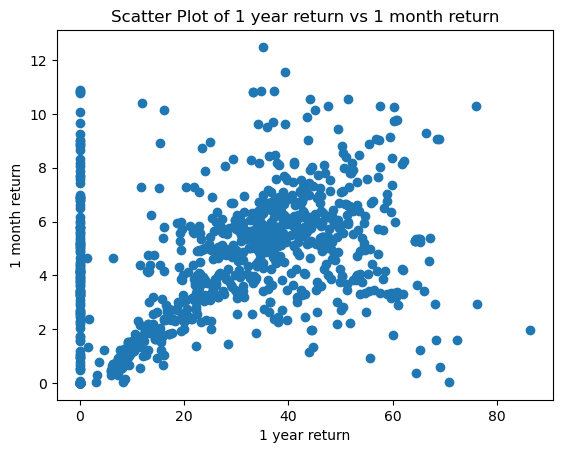

In [79]:
plt.xlabel('1 year return')
plt.ylabel('1 month return')
plt.title('Scatter Plot of 1 year return vs 1 month return')
plt.scatter(data['1 Year return'], data['1 month return'])
plt.show()

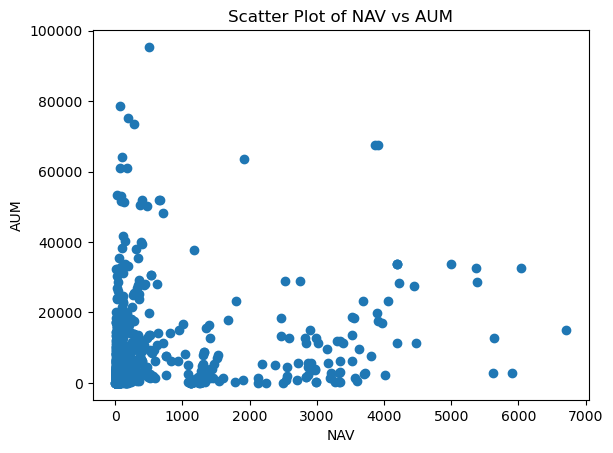

In [89]:
plt.xlabel('NAV')
plt.ylabel('AUM')
plt.title('Scatter Plot of NAV vs AUM')
plt.scatter(data['NAV'], data['AUM'])
plt.show()

In [81]:
average_return_by_risk = data.groupby('Risk')[['1 month return','1 Year return', '3 Year Return']].mean()
print(average_return_by_risk)

           1 month return  1 Year return  3 Year Return
Risk                                                   
HIGH             4.518161      33.967758      16.853767
LOW              1.039267      11.687200       6.645000
MODERATE         1.588865      13.428865       7.126424
VERY HIGH        5.010313      27.591510       7.462007


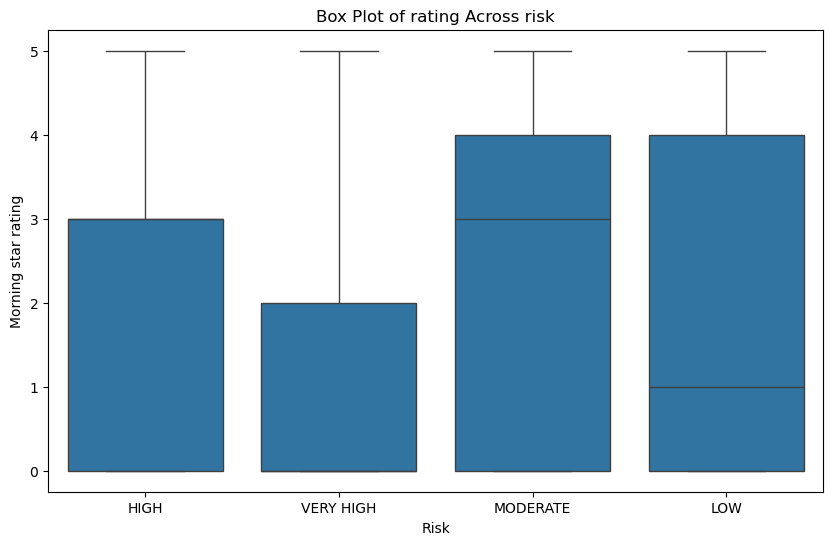

In [95]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk', y='Morning star rating', data=data)
plt.xlabel('Risk')
plt.ylabel('Morning star rating')
plt.title('Box Plot of rating Across risk')

plt.show()

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (1).

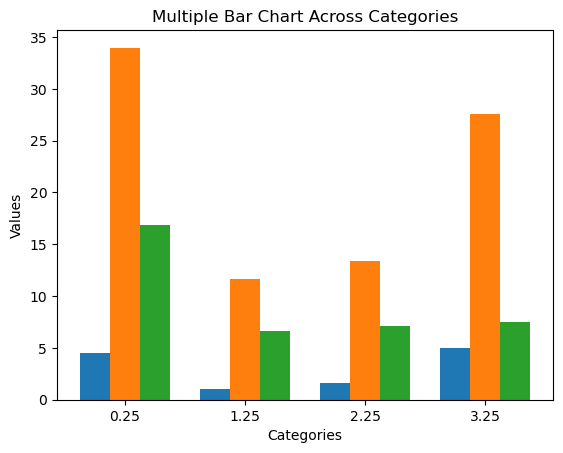

In [82]:
n_categories = 4

bar_width = 0.25
index = np.arange(n_categories)

plt.bar(index,average_return_by_risk['1 month return'], width=bar_width, label='1 month return')
plt.bar(index + bar_width, average_return_by_risk['1 Year return'], width=bar_width, label='1 Year return')
plt.bar(index + 2 * bar_width, average_return_by_risk['3 Year Return'], width=bar_width, label='3 year return')


plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Multiple Bar Chart Across Categories')

# Add category names to the x-axis
plt.xticks(index + bar_width, ['High'])

# Add a legend to distinguish the groups
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Model

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [60]:
model_data = data.drop(['Fund Name','Fund Manager', 'AMC'], axis =1)

In [ ]:
categorical_cols = ['Risk', 'Category']

onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

ct = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, categorical_cols)
    ],
    remainder='passthrough'  
)
df_encoded = ct.fit_transform(data)

encoded_cols = onehot_encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(df_encoded, columns=list(encoded_cols) + ['Morning star rating', 'Value Research rating', '1 month return', ])


In [61]:
df_encoded = pd.get_dummies(model_data, columns=['Risk', 'Category'], drop_first=True)

In [63]:
df_encoded = df_encoded.astype(int)

In [64]:
df_encoded.head()

,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,AUM,Risk_LOW,Risk_MODERATE,Risk_VERY HIGH,Category_Equity,Category_Hybrid,Category_Other
0,3,3,5,28,37,20,500,2569,0,0,0,1,0,0
1,0,3,7,24,46,21,500,322,0,0,0,1,0,0
2,4,4,5,35,54,27,500,3292,0,0,0,1,0,0
3,0,0,8,21,59,0,500,5278,0,0,1,1,0,0
4,4,3,4,23,32,15,500,577,0,0,1,1,0,0


In [66]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1383 entries, 0 to 1392
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Morning star rating    1383 non-null   int32
 1   Value Research rating  1383 non-null   int32
 2   1 month return         1383 non-null   int32
 3   NAV                    1383 non-null   int32
 4   1 Year return          1383 non-null   int32
 5   3 Year Return          1383 non-null   int32
 6   Minimum investment     1383 non-null   int32
 7   AUM                    1383 non-null   int32
 8   Risk_LOW               1383 non-null   int32
 9   Risk_MODERATE          1383 non-null   int32
 10  Risk_VERY HIGH         1383 non-null   int32
 11  Category_Equity        1383 non-null   int32
 12  Category_Hybrid        1383 non-null   int32
 13  Category_Other         1383 non-null   int32
dtypes: int32(14)
memory usage: 118.7 KB


In [ ]:
y = df_encoded.pop('Morning star rating')

In [96]:
X = df_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# the pipeline for model
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # scaling
    ('regressor', LinearRegression())         # the regression model
])

# Fiting the model using pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [97]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [98]:
print(r2)

0.43781315958554146


In [99]:
print(mae)

1.002612838601575


In [100]:
print(rmse)

1.3367233630563202
